## Time Series Analysis - Part 1 

### Exploring Rossmann Drug Store Sales Data

In [6]:
import pandas as pd

data = pd.read_csv('rossmann.csv', skipinitialspace=True, low_memory=False)

Because we are most interested in the `Date` column that contains the date of sales for each store, we will make sure to process that as a `DateTime` type, and make that the index of our dataframe.

In [8]:
data['Date'] = pd.to_datetime(data['Date']) # convert to datetime
data.set_index('Date', inplace=True) ## this removes the column but adds it back in as an index.

data['Year'] = data.index.year # Create two new variables with an index, the index will making filtering easier later on.
data['Month'] = data.index.month

In [9]:
store1_data = data[data.Store == 1] # the data set has sales info per day for several stores.

### Data Exploration and MINEing

To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days.  On state holidays, the store is closed (and as a nice sanity check there are 0 sales), and on school holidays the sales are relatively similar.

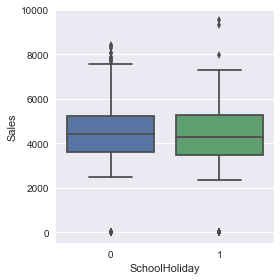

In [11]:
import seaborn as sb
%matplotlib inline

# The advantage of this box plot is that it can group by features, other techniques you'd have to slice the data before you pass 
# it to the plot.

sb.factorplot(
    # Col = 'Promo', #Optional group by 
    x='SchoolHoliday', # adds a 'group by' layer 
    y='Sales',
    data=store1_data, 
    kind='box'
)

> Check: See if there is a difference affecting sales on promotion days.

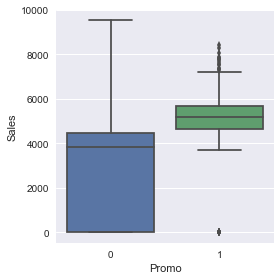

In [12]:
sb.factorplot(
    x='Promo', 
    y='Sales',
    data=store1_data, 
    kind='box'
)

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

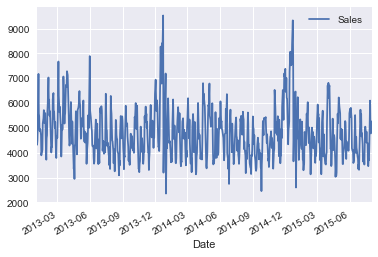

In [13]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()

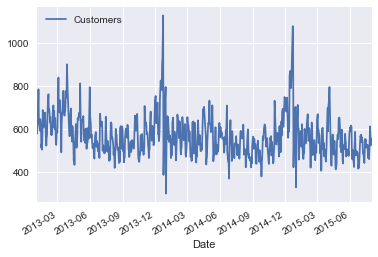

In [14]:
store1_open_data[['Customers']].plot()

In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

### Data REFINING Using Time Series Statistics

### Autocorrelation

To measure how much the sales are correlated with each other, we want to compute the _autocorrelation_ of the 'Sales' column. In pandas, we do this we with the `autocorr` function:

`autocorr` takes one argument, the `lag` which is how many prio data points should be used to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it. Setting `lag` to 10 computes the correlation between every point and the point 10 days earlier.

In [18]:
# resample allows you to aggregate the data, by day in this example.

# lag is how frequently you want to aggregate, 1= every day

data['Sales'].resample('D').mean().autocorr(lag=1)

-0.025858276006383588

In [39]:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')
average_daily_sales['Sales'].autocorr(lag=1) # compare each day

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


-0.025858276006383588

In [40]:
average_daily_sales['Sales'].autocorr(lag=30) # compare each  month

-0.12984245822530618

Months are more correlated than days.

### Rolling Averages

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates.  What were the mean and median sales for each month and year?

In Pandas, this is performed using the `resample` command, which is very similar to the `groupby` command. It allows us to group over different time intervals.

We can use `data.resample` and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - What aggregation to perform: 'mean', 'median', 'sum', etc.

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


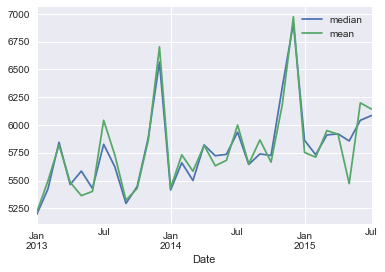

In [38]:
data[['Sales']].resample('M', how=['median', 'mean']).head()

 ## aggregate by month (summing all stores) and then plot the mean and median.
data['Sales'].resample('M', how=['median', 'mean']).plot()

While identifying the monthly averages is useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps with a few days surrounding it. We can do this using rolling averages.

In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

In [26]:
pd.rolling_mean(store1_data[['Sales']], 
                window=3, # the number of time periods to average.
                center=True, # plot the data point at the centre of the 3 day average 
                freq='D').head() # the time period to aggregate by 


# using a non-deprecated method.
# store1_data['Sales'].rolling(window=3, center=True, freq='D').mean().head()


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5504: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,freq=D,center=True).mean()


,Sales
Date,
2013-01-01,NaN
2013-01-02,3285.666667
2013-01-03,4781.000000
2013-01-04,4603.333333
2013-01-05,3161.000000


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5504: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,freq=D,center=True).mean()
  from ipykernel import kernelapp as app


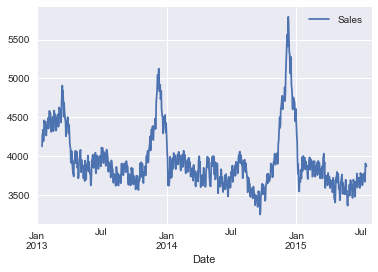

In [27]:
# increasing the window helps to clarify the trend 
pd.rolling_mean(store1_data[['Sales']], window = 30, center = True, freq = 'D').plot()

`rolling_mean` (as well as `rolling_median`) takes these important parameters:
    - the first is the series to aggregate
    - `window` is the number of days to include in the average
    - `center` is whether the window should be centered on the date or use data prior to that date
    - `freq` is on what level to roll-up the averages to (as used in `resample`). Either `D` for day, `M` for month or `A` for year, etc.

Instead of plotting the full timeseries, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.

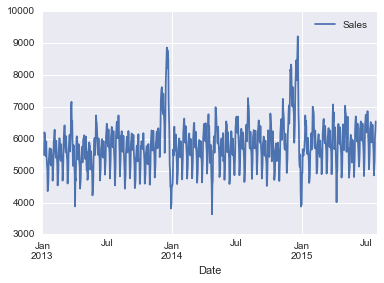

In [12]:
pd.rolling_mean(data[['Sales']], window=10, center=True, freq='D').plot()

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5504: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,freq=D,center=True).mean()
  from ipykernel import kernelapp as app
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_median is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,freq=D,center=True).median()
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\stats\moments.py:240: FutureWarning: The how kw argument is deprecated and removed in a future versi

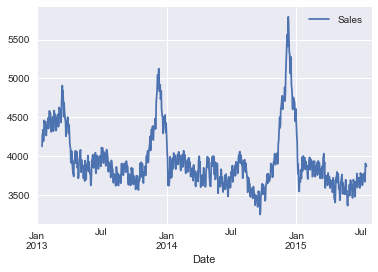

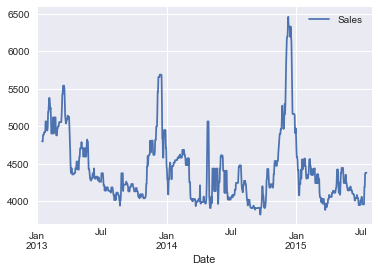

In [28]:
# Comparing mean and median moving averages
pd.rolling_mean(store1_data[['Sales']], window = 30, center = True, freq = 'D').plot()

# increasing the window helps to clarify the trend 
pd.rolling_median(store1_data[['Sales']], window = 30, center = True, freq = 'D').plot()


### Pandas Window functions
Pandas `rolling_mean` and `rolling_median` are only two examples of Pandas window function capabilities. Window functions are operate on a set of N consecutive rows (a window) and produce an output.

In addition to `rolling_mean` and `rolling_median`, there are `rolling_sum`, `rolling_min`, `rolling_max`... and many more.

Another common one is **`diff`**, which takes the difference over time. `pd.diff` takes one arugment, `periods`, which is how many rows prior to use for the difference.


In [31]:
# Taking the difference between two values using a window function 
data['Sales'].diff(periods=7).head(10)  #subtracting each day of the week from the previous one.

# nb nulls for the first 7 observations is normal as there isn't anything to compare to.

Date
2015-07-31       NaN
2015-07-31       NaN
2015-07-31       NaN
2015-07-31       NaN
2015-07-31       NaN
2015-07-31       NaN
2015-07-31       NaN
2015-07-31    3229.0
2015-07-31    2501.0
2015-07-31   -1129.0
Name: Sales, dtype: float64

In [51]:
# Creating two views of the data;
# 1 - mean customers per day 
average_daily_customers = data[['Customers']].resample('D').mean()
#2 - mean daily sales 
average_daily_sales = data[['Sales', 'Open']].resample('D').mean()

In [54]:
#Add a new field to hold the difference between the current value and the same day last week
average_daily_customers['DiffVsLastWeek'] =average_daily_customers.diff(periods=7)
average_daily_sales['DiffVsLastWeek'] = average_daily_sales[['Sales']].diff(periods=7)

average_daily_customers.head(10)


,Customers,DiffVsLastWeek
Date,,
2013-01-01,17.496409,NaN
2013-01-02,748.049327,NaN
2013-01-03,682.547085,NaN
2013-01-04,701.468161,NaN
2013-01-05,616.566816,NaN
2013-01-06,23.665471,NaN
2013-01-07,949.322870,NaN
2013-01-08,811.268161,793.771752
2013-01-09,732.474439,-15.574888


In [58]:
# sort value by the most difference 
average_daily_sales[average_daily_sales.Open == 1].sort_values(by ='DiffVsLastWeek', ascending = False).head()

,Sales,Open,DiffVsLastWeek
Date,,,
2015-06-01,10532.390135,1.0,10263.804484
2015-04-13,9932.737220,1.0,9687.965022
2014-01-08,7751.783857,1.0,7645.857399
2014-10-10,7537.330481,1.0,7207.931551
2013-12-16,14012.150673,1.0,7189.212556


### Pandas expanding functions

In addition to the set of `rolling_*` functions, Pandas also provides a similar collection of `expanding_*` functions, which, instead of using a window of N values, use all values up until that time.

In [14]:
# computes the average sales, from the first date _until_ the date specified.

# This takes the average of all previous sales, whilst moving average drops a period as it moves.
pd.expanding_mean(data['Sales'], freq='d').head()

Date
2013-01-01      87.284560
2013-01-02    3160.157527
2013-01-03    4004.475720
2013-01-04    4491.911499
2013-01-05    4661.079513
Freq: D, Name: Sales, dtype: float64

## Exponential Weighting Moving Average 

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5504: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis)


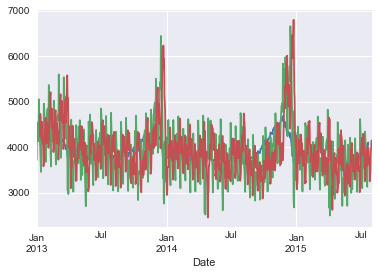

In [49]:
# Weighting the average (using Exp Weighting )
# span is the alpha function (the weighting) 

store1_data['Sales'].ewm(span = 90, # higher span will wieght more recent data more strongly and create a smoother line.
                         min_periods = 10
                        ).mean().plot()

#Comparing above to lower span.
store1_data['Sales'].ewm(span = 10, # higher span will wieght more recent data more strongly and create a smoother line.
                         min_periods = 10
                        ).mean().plot()


# # Comparing to normal rolling mean, all aggregating sales over 10 days.
# pd.rolling_mean(store1_data[['Sales']], window = 10, freq='D').plot()
store1_data['Sales'].rolling(window=10, freq='D').mean().plot()


More recent days have a higher weight when using EWMA.

## Exercises

> Plot the distribution of sales by month and compare the effect of promotions

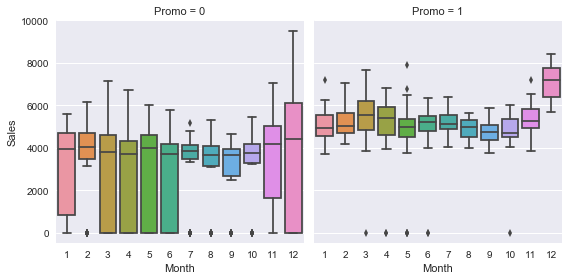

In [13]:
sb.factorplot(
    col = 'Promo', 
    x='Month',
    y='Sales',
    data=store1_data, 
    kind='box')

> Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

In [17]:
print('prev day', store1_data['Sales'].resample('D').mean().autocorr(lag=1)) 
print('same date last year',store1_data['Sales'].resample('D').mean().autocorr(lag=365))
print('same day last month', store1_data['Sales'].resample('D').mean().autocorr(lag=30)) 

prev day -0.127325143391
same date last year -0.0581932157053
same day last month -0.0794070299952


More correlated with previous day

> Plot the 15 day rolling mean of customers in the stores

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5504: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis)


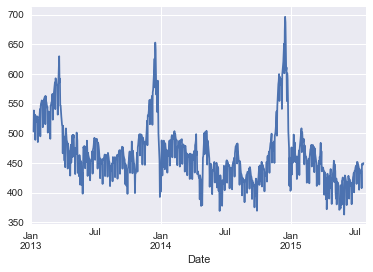

In [34]:
# pd.rolling_mean(store1_data[['Customers']], window=15, center=True, freq='D').plot()

store1_data['Customers'].rolling(window=15, center=True, freq='D').mean().plot()

> Identify the date with largest drop in sales from the same date in the previous week

In [100]:
avg_daily_sales = store1_data[['Sales','Open']][store1_data.Open ==1].resample('D').sum()
avg_daily_sales['DiffVsLastWeek'] = avg_daily_sales[['Sales']].diff(periods =7)# nb diff default period =1

#this version shows the date associated with the largest drop in sales.
print(avg_daily_sales.sort_values(by = 'DiffVsLastWeek').head(1))

# this just reports the largest drop without the date.
print(avg_daily_sales[['Sales']].diff(periods = 7).min())


             Sales  Open  DiffVsLastWeek
Date                                    
2013-12-24  3204.0   1.0         -4152.0
Sales   -4152.0
dtype: float64


> Compute the total sales up until Dec. 2014

In [38]:
total_daily_sales = data[['Sales']].resample('D').sum() #resamping to aggregate the different stores 
pd.expanding_sum(total_daily_sales)['2014-12'].head(1) # then showing the total sum of sales up to Dec 2014


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.expanding_sum is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.expanding(min_periods=1).sum()
  from ipykernel import kernelapp as app


,Sales
Date,
2014-12-01,4.291837e+09


> When were the largest differences between 15-day moving/rolling averages?
> HINT: Using `rolling_mean` and `diff`

In [69]:
pd.rolling_mean(data[['Sales']],window = 15, freq='D',how='mean').diff(1).sort_values(by = 'Sales', ascending = False).head()

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5504: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,freq=D,center=False).mean(how=mean)
  if __name__ == '__main__':
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\stats\moments.py:240: FutureWarning: The how kw argument is deprecated and removed in a future version. You can resample prior to passing to a window function
  result = getattr(r, name)(*args, **kwds)


,Sales
Date,
2013-12-16,920.987444
2014-12-15,847.866310
2013-12-23,846.632646
2014-06-30,781.484544
2014-12-22,770.850053
